# Introduction to Board games reviews dataset\

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

board_games = pd.read_csv("board_games.csv")

board_games.dropna(inplace=True)
board_games = board_games[board_games['users_rated']>0]
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [62]:
board_games.isnull().sum()

id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

In [63]:
board_games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000
mean,64092.223943,1874.793089,2.004834,5.572837,59.921503,57.457184,59.921503,7.591556,231.360477,6.016113,1.654372,374.507470,13.166432,18.002689,60.579024,70.344219,23.548722,1.269716
std,57513.253779,486.032042,0.791475,50.773395,406.451917,393.197450,406.451917,4.869533,1364.124459,1.578830,2.646445,1787.003768,46.984706,71.984315,284.161400,338.375579,138.053005,1.213841
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16133.250000,1989.000000,2.000000,2.000000,15.000000,15.000000,15.000000,4.000000,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,36921.000000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,6.150000,0.000000,20.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
75%,118558.750000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,39.000000,7.040000,5.488240,125.000000,6.000000,6.000000,15.000000,19.000000,5.000000,2.000000
max,184260.000000,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


# Picking an Error Metric

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

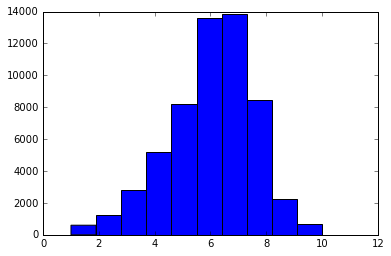

In [64]:
plt.hist(board_games.average_rating)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9c39805ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9c3980b898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c3980ea20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c3980e208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c39808828>,
  <matplotlib.lines.Line2D at 0x7f9c39808f60>]}

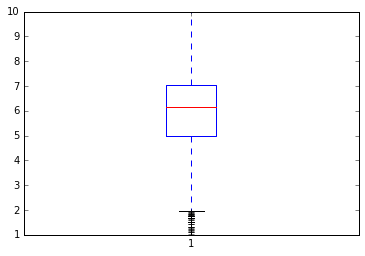

In [65]:
plt.boxplot(board_games.average_rating)

Histogram is negatively Skewed showing the resemblance of a normal distrubition. MSE would be a good metric for evaluating the data.  

In [66]:
from sklearn.cluster import KMeans

cols = board_games.columns
cols

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [67]:
cols = cols[3:]

In [68]:
numeric_columns = board_games[cols]

In [69]:
numeric_columns

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


In [70]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(board_games[cols])
labels = kmeans.labels_

In [71]:
game_mean = numeric_columns.apply(np.mean,axis=1)
game_std = numeric_columns.apply(np.std, axis=1)

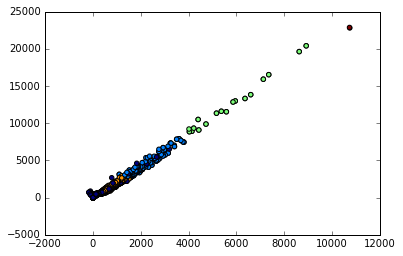

In [72]:
plt.scatter(game_mean, game_std, c=labels)

In [73]:
correlations = numeric_columns.corr()

correlations['average_rating']


yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

Year published carries a decentr correlation with rating as does minage